In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd


(array([488., 412., 311., 260., 306., 244., 261., 282., 224., 281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <BarContainer object of 10 artists>)

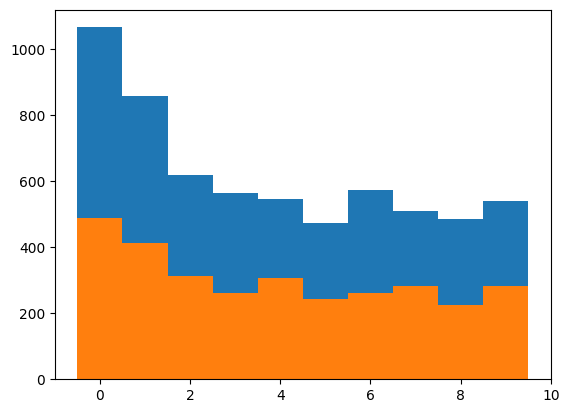

In [2]:
# Chargement des données
data = pkl.load(open("../data/usps.pkl",'rb')) 
# data est un dictionnaire contenant les champs explicites X_train, X_test, Y_train, Y_test
X_train = np.array(data["X_train"],dtype=float) # changement de type pour éviter les problèmes d'affichage
X_test = np.array(data["X_test"],dtype=float)
Y_train = data["Y_train"]
Y_test = data["Y_test"]


# onehot encoding
Y_train_onehot = onehot(Y_train)
Y_test_onehot = onehot(Y_test)
Y_train_onehot = Y_train_onehot.astype(int)


# normalisation des données
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)


# visualisation de la distribution des étiquettes (dans les 10 classes de chiffres)
plt.figure()
plt.hist(Y_train, np.linspace(-0.5,9.5,11))
plt.hist(Y_test, np.linspace(-0.5,9.5,11))
#plt.savefig("distr_classes.png")

(6229, 256)
(3069, 256) (6229,) (3069,)


Text(0.5, 1.0, 'Image de : 6')

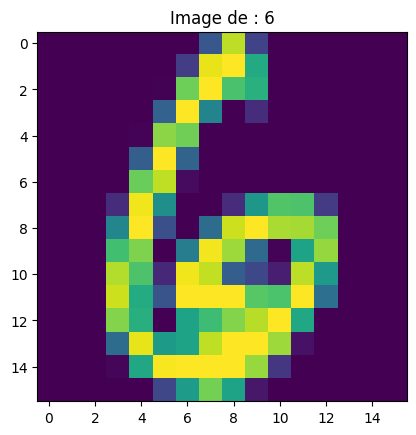

In [3]:
# prise en main des matrices X, Y
print(X_train.shape)
# 6229 images composées de 256 pixels (image = 16x16)
print(X_test.shape,Y_train.shape, Y_test.shape)

# Affichage de l'image 18 de la base de données et récupération de l'étiquette associée:
# (1) remise en forme de la ligne de 256 pixels en 16x16
# (2) affichage avec imshow (en niveaux de gris)
# (3) récupération de l'étiquette dans Y_train

plt.figure()
plt.imshow(X_train[18].reshape(16,16))
plt.title("Image de : {}".format(Y_train[18]))

In [4]:
# traitement des donnees pour faire la convolution
X_train = X_train.reshape(-1,16,16)
X_test = X_test.reshape(-1,16,16)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)



In [5]:
conv1 =  Conv1D(1, 16, 3, stride=1)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10,biais=False)
bce_loss = BCELoss()

loss_list= []
encoder = [conv1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 256), sigmoid]
net = Sequential(encoder)

In [6]:
conv1.forward(X_train).shape


AssertionError: X must have 2 channels. Here X have 16 channels.

In [ ]:
# Boucle d'entraînement en full batc
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(X_train)

    # Calculer la perte
    loss = bce_loss.forward(X_train, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, np.mean(loss)))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = bce_loss.backward(X_train, yhat)
    delta = net.backward(X_train, delta, gradient_step = 0.1)


Erreur de dimension
X.shape[1] =  16
self._parameters.shape[0] =  128


AssertionError: 

In [ ]:
import torch 
import torch.nn as nn
convtest = nn.Conv2d(1, 3, 4, stride=1, bias=False)
A = torch.from_numpy(X_train[:, np.newaxis, :, :])
convtest(A.float()).shape

torch.Size([6229, 3, 13, 13])